## CCTV와 인구분석 2
- 전처리되어져서 저장된 데이터 불러오기

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [16]:
# 데이터 가져오기
cctv_res=pd.read_csv('./data/data_result.csv')
cctv_res.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


In [7]:
cctv_res.set_index('구별',inplace=True)

In [8]:
cctv_res.head(2)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843


#### CCTV와 인구수 관계 표현
- 소계 , 인구수 산점도
- 소계 , 인구수 대표하는 직선(회귀직선

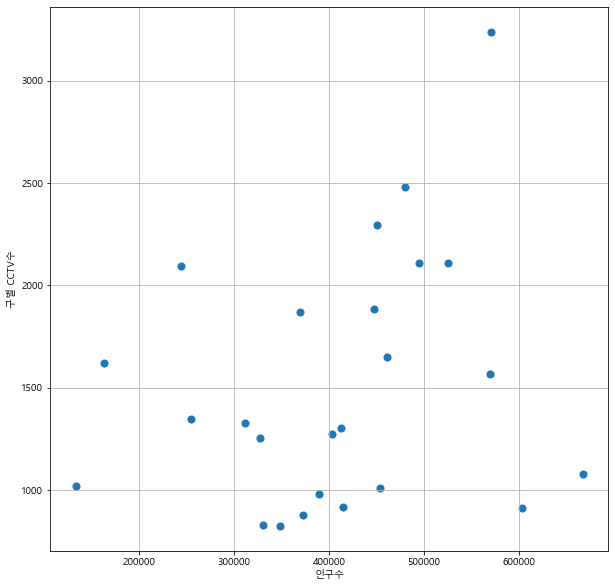

In [10]:
# 인구수와 CCTV수 간의 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'],cctv_res['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('구별 CCTV수')
plt.grid()
plt.show()

In [30]:
np.corrcoef([cctv_res['인구수'],cctv_res['소계']])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

- 인구수와 cctv 대표하는 직선 그리기

In [12]:
# 기울기와 절편 - np.polyfit(data1,data2,차수)
poly_fit=np.polyfit(cctv_res.인구수,cctv_res.소계,1)
poly_fit

array([1.15151285e-03, 1.04561312e+03])

In [17]:
# 직선식을 생성 - np,poly1d(게수)
poly_1d=np.poly1d(poly_fit)
poly_1d

poly1d([1.15151285e-03, 1.04561312e+03])

In [22]:
# x좌표(인구수)
xs=np.linspace(cctv_res.인구수.min(),cctv_res.인구수.max())
xs

array([133240.        , 144142.91836735, 155045.83673469, 165948.75510204,
       176851.67346939, 187754.59183673, 198657.51020408, 209560.42857143,
       220463.34693878, 231366.26530612, 242269.18367347, 253172.10204082,
       264075.02040816, 274977.93877551, 285880.85714286, 296783.7755102 ,
       307686.69387755, 318589.6122449 , 329492.53061224, 340395.44897959,
       351298.36734694, 362201.28571429, 373104.20408163, 384007.12244898,
       394910.04081633, 405812.95918367, 416715.87755102, 427618.79591837,
       438521.71428571, 449424.63265306, 460327.55102041, 471230.46938776,
       482133.3877551 , 493036.30612245, 503939.2244898 , 514842.14285714,
       525745.06122449, 536647.97959184, 547550.89795918, 558453.81632653,
       569356.73469388, 580259.65306122, 591162.57142857, 602065.48979592,
       612968.40816327, 623871.32653061, 634774.24489796, 645677.16326531,
       656580.08163265, 667483.        ])

In [23]:
# x좌표(인구수)에 대응하는 y좌표(CCTV대수)
ys=poly_1d(xs)
ys

array([1199.04069124, 1211.59554181, 1224.15039238, 1236.70524294,
       1249.26009351, 1261.81494407, 1274.36979464, 1286.92464521,
       1299.47949577, 1312.03434634, 1324.5891969 , 1337.14404747,
       1349.69889804, 1362.2537486 , 1374.80859917, 1387.36344973,
       1399.9183003 , 1412.47315087, 1425.02800143, 1437.582852  ,
       1450.13770256, 1462.69255313, 1475.2474037 , 1487.80225426,
       1500.35710483, 1512.9119554 , 1525.46680596, 1538.02165653,
       1550.57650709, 1563.13135766, 1575.68620823, 1588.24105879,
       1600.79590936, 1613.35075992, 1625.90561049, 1638.46046106,
       1651.01531162, 1663.57016219, 1676.12501275, 1688.67986332,
       1701.23471389, 1713.78956445, 1726.34441502, 1738.89926558,
       1751.45411615, 1764.00896672, 1776.56381728, 1789.11866785,
       1801.67351841, 1814.22836898])

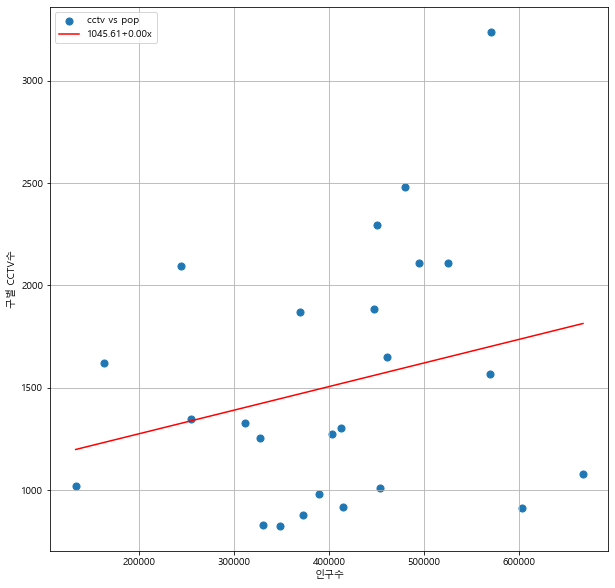

In [28]:
# 직선을 포함한 그래프 생성
# 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'],cctv_res['소계'],s=50,label='cctv vs pop')
plt.plot(xs,ys,color='red',label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.xlabel('인구수')
plt.ylabel('구별 CCTV수')
plt.legend(loc='upper left')
plt.grid()
plt.show()

- 인구수가 400000명이면 적정 CCTV 대수는 1500대라는 것을 표현함
- 직선 위에 표현되는 data는 적정 CCTV대 수를 보유한 구
- 직선 아래에 표현되는 data는 적정 CCTV대 수를 보유하지 못한 구

In [29]:
poly_1d(400000)

1506.218258217946